In [1]:
%matplotlib notebook

import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tqdm

# Summary of Riddler Express

The Cubs ended their famous 108-year World Series championship drought one month ago. But is 108 years really a long time? Suppose there were a league of 30 teams with a winner chosen uniformly at random every year. Each time the team that hasn’t won in the longest time does win, the length of that drought makes the headlines. (You can assume when the league starts that each team has a zero-year drought.) What are the lengths of these headline-making droughts, on average?

## longest drought, no other info

In [2]:
N = 100000
history = pd.DataFrame([{'longest_drought': None} for i in range(N)])

df = pd.DataFrame([{'years_since_win': 0} for i in range(30)])
df.head()

for i in tqdm.trange(N):
    df.loc[:, 'years_since_win'] += 1
    df.loc[random.randint(0, 29), 'years_since_win'] = 0
    history.loc[i, 'longest_drought'] = df.years_since_win.max()

  7%|▋         | 7021/100000 [00:10<02:18, 670.61it/s]


KeyboardInterrupt: 

In [3]:
history.plot()

<IPython.core.display.Javascript object>

In [4]:
history.longest_drought.mean()

119.99930000000001

## solving the *real* problem

In [6]:
N = 100000
headlines = []

df = pd.DataFrame([{'years_since_win': 0} for i in range(30)])
df.head()

for i in tqdm.trange(N):
    iRand = random.randint(0, 29)
    iMax = df.idxmax().years_since_win
    if iRand == iMax:
        headlines.append(df.years_since_win.max())
    df.loc[:, 'years_since_win'] += 1
    df.loc[iRand, 'years_since_win'] = 0

100%|██████████| 100000/100000 [01:38<00:00, 1011.65it/s]


In [7]:
headlines = pd.DataFrame(headlines, columns=['headline_drought_length'])

<IPython.core.display.Javascript object>


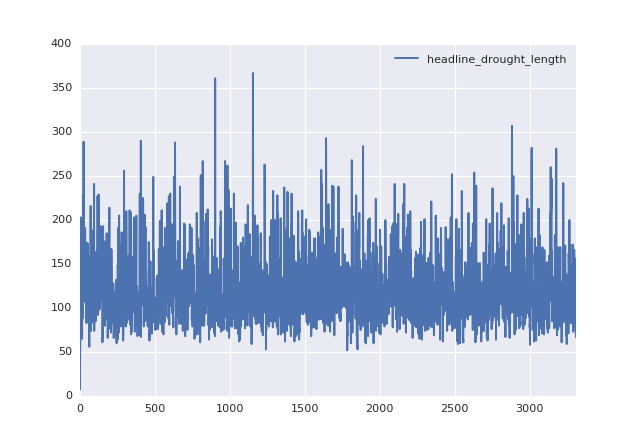

In [8]:
headlines.plot()

In [9]:
headlines.mean()

headline_drought_length    119.366355
dtype: float64

In [10]:
headlines.tail(20)

,headline_drought_length
3291,89
3292,73
3293,80
3294,81
3295,95
3296,131
3297,106
3298,166
3299,113
3300,135


<IPython.core.display.Javascript object>


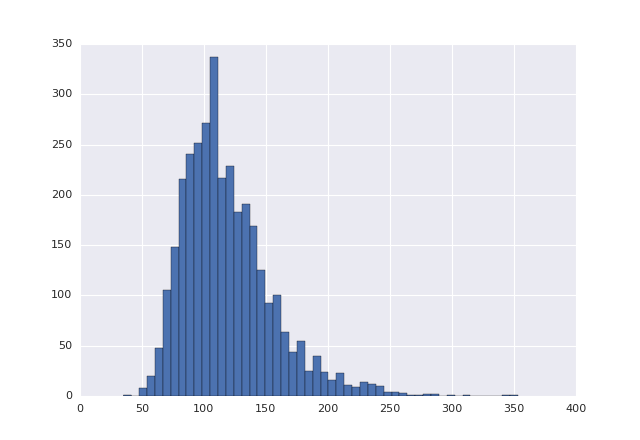

100%|██████████| 100000/100000 [13:17<00:00, 125.45it/s]


In [3]:
N = 100000
headlines = []
f = plt.figure()
s = f.add_subplot(111)

df = pd.DataFrame([{'years_since_win': 0} for i in range(30)])
df.head()

for i in tqdm.trange(N):
    iRand = random.randint(0, 29)
    iMax = df.idxmax().years_since_win
    if iRand == iMax:
        headlines.append(df.years_since_win.max())
        s.clear()
        s.hist(headlines, bins=50)
        f.canvas.draw()
    df.loc[:, 'years_since_win'] += 1
    df.loc[iRand, 'years_since_win'] = 0

<IPython.core.display.Javascript object>


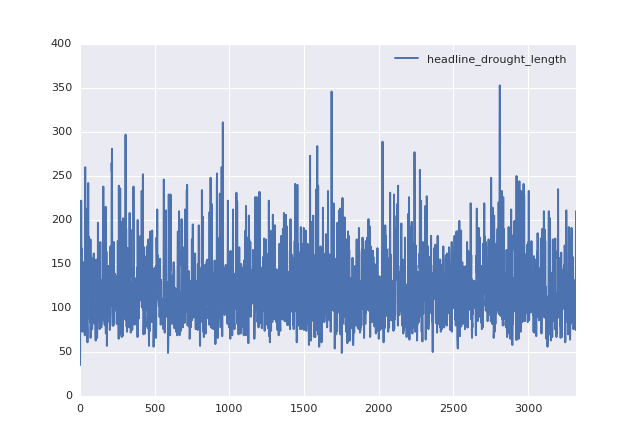

In [4]:
headlines = pd.DataFrame(headlines, columns=['headline_drought_length'])
headlines.plot()

In [5]:
headlines.mean()

headline_drought_length    119.077085
dtype: float64

In [6]:
headlines.tail(20)

,headline_drought_length
3301,95
3302,76
3303,77
3304,78
3305,81
3306,81
3307,95
3308,92
3309,130
3310,93


# Summary of Riddler Classic

The 41 FiveThirtyEight staff members have decided to send gifts to each other as part of a Secret Santa program. Each person is randomly assigned one of the other 40 people on the masthead to give a gift to, and they can’t give to themselves. After the Secret Santa is over, everybody naturally wants to find out who gave them their gift. So, each of them decides to ask up to 20 people who they were a Secret Santa for. If they can’t find the person who gave them the gift within 20 tries, they give up. (Twenty co-workers is a lot of co-workers to talk to, after all.) Each person asks and answers individually — they don’t tell who anyone else’s Secret Santa is. Also, nobody asks any question other than “Who were you Secret Santa for?”

If each person asks questions optimally, giving themselves the best chance to unmask their Secret Santa, what is the probability that everyone finds out who their Secret Santa was? And what is this optimal strategy? (Asking randomly won’t work, because only half the people will find their Secret Santa that way on average, and there’s about a 1-in-2 trillion chance that everyone will know.)